In [1]:
!pip install plotly
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns

/tmp/ipykernel_10594/1124444730.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
# Especifique o caminho para o seu arquivo CSV
caminho_arquivo = '../../dados/dados_siape_consolidado/org_exercicio/cadastro_siape_consolidado_org_exercicio_mes_ano_completo-2021-2023.csv'

df_orgaos = pd.read_csv(caminho_arquivo)

In [ ]:
df_orgaos['ano'].unique()

In [8]:
df_orgaos['ano_mes'] = df_orgaos['ano'].astype(str) + '-' + df_orgaos['mes'].astype(str).str.zfill(2)

In [ ]:
df_orgaos['ano_mes']

In [ ]:
df_orgaos.info()

In [5]:
def dicionario_servidores_e_estagio_orgao_ano_mes (df_orgaos, orgaos_escolhidos):

    dicionario_orgaos = {}
    
    meses = df_orgaos['ano_mes'].unique()

    for orgao in orgaos_escolhidos:

        display (orgao)
        
        for mes in meses:                
            
            qtd_regime_unico = df_orgaos[
                        df_orgaos["REGIME_JURIDICO"].str.contains("regime juridico unico", na=False, case=False) &
                        df_orgaos["ORG_EXERCICIO"].str.contains(orgao, na=False, case=False) &
                        (df_orgaos['ano_mes'] == mes)]["Contagem"].sum()
            
            qtd_estagiario =  df_orgaos[
                        df_orgaos["REGIME_JURIDICO"].str.contains("estag", na=False, case=False) &
                        df_orgaos["ORG_EXERCICIO"].str.contains(orgao, na=False, case=False) &
                        (df_orgaos['ano_mes'] == mes)]["Contagem"].sum()

            if not orgao in dicionario_orgaos:
                dicionario_orgaos[orgao] = {}

                        
            dicionario_orgaos[orgao][mes] = {'regime_unico': qtd_regime_unico,'estagiarios': qtd_estagiario,'indice_estagio': qtd_estagiario/qtd_regime_unico}

    # Convertendo o dicionário em DataFrame
    df_resultado = pd.DataFrame.from_dict({(i, j): dicionario_orgaos[i][j] 
                                           for i in dicionario_orgaos.keys() 
                                           for j in dicionario_orgaos[i].keys()},
                                          orient='index')

    df_resultado = df_resultado.reset_index().rename(columns={'level_0': 'org_exercicio', 'level_1': 'ano_mes'})
    
    return df_resultado
    





In [14]:

def gerar_grafico_indice_estagio (df, titulo):

    display (Markdown(f'# {titulo}'))
    
    # Criar gráfico de linha
    plt.figure(figsize=(10, 6))
    
    for org in df['org_exercicio'].unique():
        df_org = df[df['org_exercicio'] == org]
        x = df_org['ano_mes'].to_numpy()
        y = df_org['indice_estagio'].to_numpy()
        plt.plot(x, y, label=org)
    
    plt.title('Índice de Estágio ao longo do Tempo')
    plt.xlabel('Ano Mês')
    plt.ylabel('Índice de Estágio')
    plt.legend()
    plt.show()

'ministério da economia'

'ministerio da fazenda'

/tmp/ipykernel_10594/3986036744.py:27: RuntimeWarning: invalid value encountered in scalar divide
  dicionario_orgaos[orgao][mes] = {'regime_unico': qtd_regime_unico,'estagiarios': qtd_estagiario,'indice_estagio': qtd_estagiario/qtd_regime_unico}


# Índice estagiários/servidores no Ministério da Fazenda e Ministério da Economia

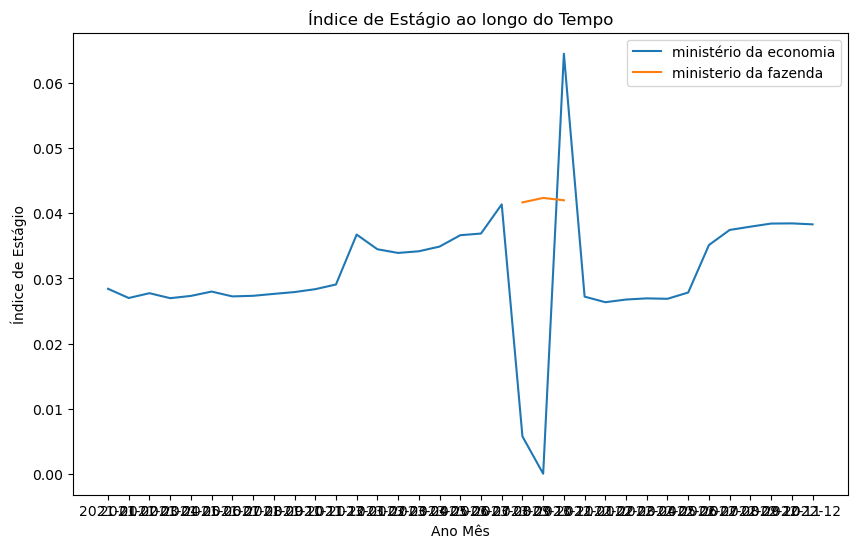

In [13]:
orgaos_escolhidos = [
    'ministério da economia', 
    'ministerio da fazenda'
    ]

df_resultado_fazenda_e_economia = dicionario_servidores_e_estagio_orgao_ano_mes(df_orgaos, orgaos_escolhidos)

gerar_grafico_indice_estagio (df_resultado_fazenda_e_economia, "Índice estagiários/servidores no Ministério da Fazenda e Ministério da Economia")

In [ ]:
df_resultado

In [ ]:
orgaos_escolhidos = [
    'Instituto Nacional do Seguro Social',
    'ministério da economia', 
    'ministerio da fazenda',
    'Advocacia-Geral da União' ,     
    'Ministério da Ciência, Tecnologia, Inovações e Comunicações', 
    'Ministério da Saúde'
]

df_todos_orgaos_escolhidos = dicionario_servidores_e_estagio_orgao_ano_mes(df_orgaos, orgaos_escolhidos)

In [ ]:


gerar_grafico_indice_estagio (df_todos_orgaos_escolhidos, "Índice estagiários/servidores nos Órgãos escolhidos")